In [13]:
%matplotlib notebook

In [1]:
import numpy as np
import random
import itertools
from graph_tool import Graph, GraphView
from graph_tool.draw import graph_draw
from tqdm import tqdm

from matplotlib import pyplot as plt

from viz_helpers import lattice_node_pos
from minimum_steiner_tree import min_steiner_tree
from cascade_generator import si, observe_cascade
from eval_helpers import infection_precision_recall
from graph_helpers import remove_filters, load_graph_by_name

from inference import infer_infected_nodes
from query_selection import RandomQueryGenerator, OurQueryGenerator, PRQueryGenerator
from experiment import gen_input, one_round_experiment

In [2]:
graph_name = 'lattice'
g = load_graph_by_name(graph_name)

In [3]:
if False:
    import graph_tool as gt
    pos = gt.draw.sfdp_layout(gv)
    vertex_text = g.new_vertex_property('string')
    for v in g.vertices():
        vertex_text[v] = str(v)
    gt.draw.graph_draw(gv, pos=pos, vertex_text=vertex_text)

In [50]:
def one_combined_round(g, n_queries, obs, c, inference_method, n_samples=100):
    from graph_helpers import gen_random_spanning_tree
    
    sp_trees = [gen_random_spanning_tree(g) for i in range(n_samples)]
    
    scores = []
    # for rand method
    gv = remove_filters(g)
    rand_gen = RandomQueryGenerator(gv, obs)
    score = one_round_experiment(gv, obs, c, rand_gen, 'random', inference_method, sp_trees, n_queries)
    scores.append(score)
    
    # for our method
    gv = remove_filters(g)
    our_gen = OurQueryGenerator(gv, obs, num_spt=100, num_stt=50,
                                method='entropy',
                                use_resample=False)
    score = one_round_experiment(gv, obs, c, our_gen, 'ours', inference_method, sp_trees, n_queries)
    scores.append(score)    
    
    # for our pagerank
    gv = remove_filters(g)
    pr_gen = PRQueryGenerator(gv, obs)
    score = one_round_experiment(gv, obs, c, pr_gen, 'pagerank', inference_method, sp_trees, n_queries)
    scores.append(score)
    
    return scores
    

In [28]:
from joblib import Parallel, delayed
scores = {
    'random': [],
    'pagerank': [],
    'ours': []
}

n_rounds = 50
n_queries = 10


sc = Parallel(n_jobs=4)(delayed(one_combined_round)(g, n_queries, *gen_input(g, stop_fraction=0.25),
                                                    inference_method='sampling')
                     for i in tqdm(range(n_rounds)))
for rd, our, pr in sc:
    scores['random'].append(rd)
    scores['ours'].append(our)
    scores['pagerank'].append(pr)

 14%|█▍        | 7/50 [00:00<00:05,  8.17it/s]

n_queries 10
n_queries 10
n_queries 10
n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done


 14%|█▍        | 7/50 [00:20<02:02,  2.86s/it]

pr done


 16%|█▌        | 8/50 [00:20<04:19,  6.18s/it]

pr done
pr done


 20%|██        | 10/50 [00:20<02:53,  4.34s/it]

pr done


 22%|██▏       | 11/50 [00:21<02:00,  3.08s/it]

n_queries 10
n_queries 10
n_queries 10
n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done
pr done


 24%|██▍       | 12/50 [00:41<05:13,  8.26s/it]

pr done


 26%|██▌       | 13/50 [00:41<03:37,  5.89s/it]

pr done
pr done
n_queries 10
n_queries 10
n_queries 10
n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done
pr done


 32%|███▏      | 16/50 [01:02<03:29,  6.16s/it]

pr done


 34%|███▍      | 17/50 [01:02<02:25,  4.40s/it]

pr done
n_queries 10
pr done


 38%|███▊      | 19/50 [01:02<01:37,  3.15s/it]

n_queries 10
n_queries 10
n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done
pr done


 40%|████      | 20/50 [01:23<04:10,  8.34s/it]

pr done


 42%|████▏     | 21/50 [01:23<02:51,  5.91s/it]

pr done


 44%|████▍     | 22/50 [01:23<01:57,  4.18s/it]

n_queries 10
n_queries 10
n_queries 10
pr done


 46%|████▌     | 23/50 [01:24<01:23,  3.10s/it]

n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done
pr done


 48%|████▊     | 24/50 [01:44<03:33,  8.21s/it]

pr done


 50%|█████     | 25/50 [01:44<02:26,  5.85s/it]

n_queries 10
pr done


 52%|█████▏    | 26/50 [01:44<01:39,  4.15s/it]

n_queries 10
n_queries 10
pr done


 54%|█████▍    | 27/50 [01:45<01:11,  3.13s/it]

n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done
pr done


 56%|█████▌    | 28/50 [02:05<02:59,  8.18s/it]

pr done


 58%|█████▊    | 29/50 [02:06<02:02,  5.84s/it]

n_queries 10
pr done


 60%|██████    | 30/50 [02:06<01:23,  4.16s/it]

n_queries 10
n_queries 10
pr done


 62%|██████▏   | 31/50 [02:07<01:00,  3.17s/it]

n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done
pr done


 64%|██████▍   | 32/50 [02:26<02:25,  8.06s/it]

pr done


 66%|██████▌   | 33/50 [02:26<01:36,  5.69s/it]

n_queries 10
pr done


 68%|██████▊   | 34/50 [02:27<01:05,  4.08s/it]

n_queries 10
n_queries 10
pr done


 70%|███████   | 35/50 [02:28<00:48,  3.22s/it]

n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done
pr done


 72%|███████▏  | 36/50 [02:47<01:50,  7.89s/it]

pr done
pr done


 76%|███████▌  | 38/50 [02:47<01:06,  5.56s/it]

n_queries 10
n_queries 10
n_queries 10
pr done


 78%|███████▊  | 39/50 [02:48<00:47,  4.33s/it]

n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done
pr done


 80%|████████  | 40/50 [03:07<01:25,  8.56s/it]

pr done


 82%|████████▏ | 41/50 [03:07<00:54,  6.05s/it]

n_queries 10
pr done


 84%|████████▍ | 42/50 [03:07<00:34,  4.35s/it]

n_queries 10
n_queries 10
pr done


 86%|████████▌ | 43/50 [03:09<00:24,  3.49s/it]

n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done
pr done


 88%|████████▊ | 44/50 [03:27<00:48,  8.05s/it]

pr done
pr done


 92%|█████████▏| 46/50 [03:28<00:22,  5.71s/it]

n_queries 10
n_queries 10
n_queries 10
pr done


 94%|█████████▍| 47/50 [03:29<00:13,  4.46s/it]

n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done
pr done


 96%|█████████▌| 48/50 [03:48<00:17,  8.58s/it]

pr done


 98%|█████████▊| 49/50 [03:48<00:06,  6.05s/it]

n_queries 10
pr done


100%|██████████| 50/50 [03:48<00:00,  4.34s/it]

n_queries 10


n_queries 10
pr done
n_queries 10
random done
random done
random done
random done
our done
our done
our done
our done
pr done
pr done
n_queries 10
n_queries 10
pr done
pr done
random done
random done
our done
our done
pr done
pr done


In [29]:
rand_mean_scores = np.mean(np.asarray(scores['random']), axis=0)
our_mean_scores = np.mean(np.asarray(scores['ours']), axis=0)
pr_mean_scores = np.mean(np.asarray(scores['pagerank']), axis=0)

<IPython.core.display.Javascript object>


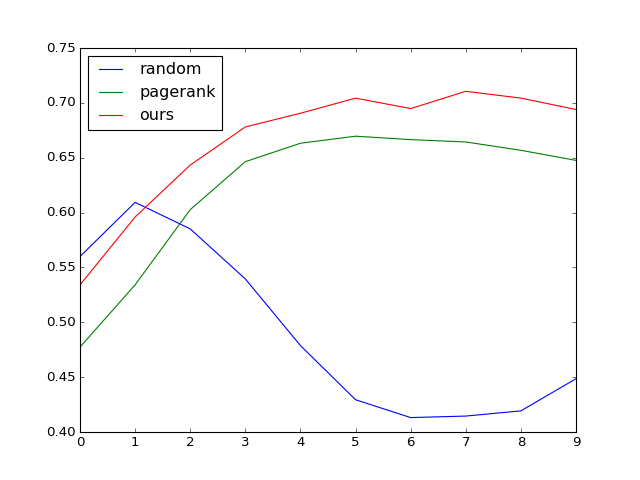

In [30]:
rand_prec, rand_rec = zip(*rand_mean_scores)
pr_prec, pr_rec = zip(*pr_mean_scores)
our_prec, our_rec = zip(*our_mean_scores)
fig = plt.figure()
fig.clf()
plt.plot(rand_prec)
plt.plot(pr_prec)
plt.plot(our_prec)
plt.legend(['random', 'pagerank', 'ours'], loc='upper left')
fig.savefig('figs/percision-{}.pdf'.format(graph_name))

<IPython.core.display.Javascript object>


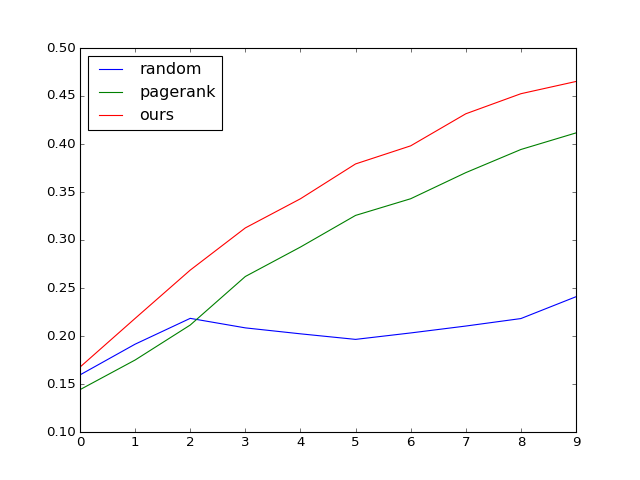

In [33]:
plt.figure()
plt.plot(rand_rec)
plt.plot(pr_rec)
plt.plot(our_rec)
plt.legend(['random', 'pagerank', 'ours'], loc='upper left')
fig.savefig('figs/recall-{}.pdf'.format(graph_name))